<a href="https://colab.research.google.com/github/janastadtruckerova/real_est_prediction/blob/main/predikcia_nehnute%C4%BEnost%C3%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predikcia cien nehunuteľností Lieánrna regresia**

**Načítanie datasetu California Housing**

Tento dataset je súčasťou sklearn.datasets

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Načítanie datasetu
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target  # Cieľová premenná (stredná cena domu)


**Preskúmanie štruktúry dát**


In [ ]:
print(X.head())  # Prvých 5 riadkov
print(X.info())  # Informácie o dátach
print(X.describe())  # Štatistický prehľad dát


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    

**Kontrola chýbajúcich hodnôt**


In [ ]:
print(X.isnull().sum())  # Overenie chýbajúcich hodnôt


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


**Rozdelenie dát na trénovaciu a testovaciu množinu**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Trénovanie modelu lineárnej regresie**


In [ ]:
from sklearn.linear_model import LinearRegression

# Inicializácia modelu
model = LinearRegression()

# Trénovanie modelu
model.fit(X_train, y_train)




LinearRegression()

**Po natrénovaní môžeme získať koeficienty a priesečník**




In [ ]:
print(f'Priesečník (intercept): {model.intercept_}')
print(f'Koeficienty: {model.coef_}')


Priesečník (intercept): -37.02327770606409
Koeficienty: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]


**Overenie predpokladov lineárnej regresie**

1️⃣ Lineárna závislosť medzi vstupmi a výstupom
Skontrolujeme scatter plot niektorých premenných voči cieľovej premennej:

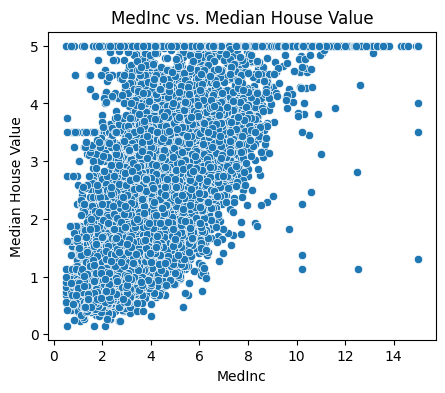

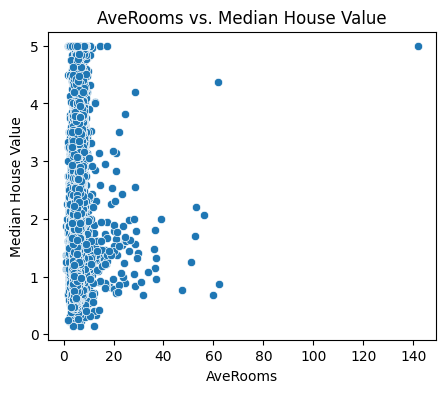

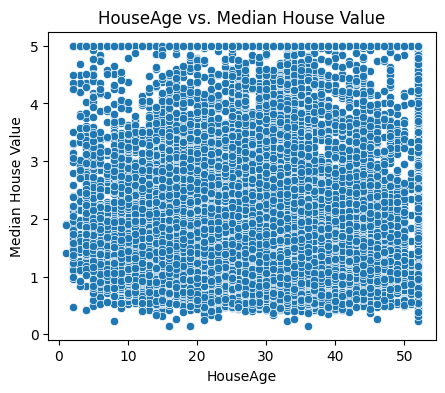

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vizualizácia niektorých features voči cieľovej premennej
features = ["MedInc", "AveRooms", "HouseAge"]  # Vybrané features na kontrolu
for feature in features:
    plt.figure(figsize=(5, 4))
    sns.scatterplot(x=X_train[feature], y=y_train)
    plt.xlabel(feature)
    plt.ylabel("Median House Value")
    plt.title(f"{feature} vs. Median House Value")
    plt.show()


**Homoskedasticita (rovnaký rozptyl chýb)**

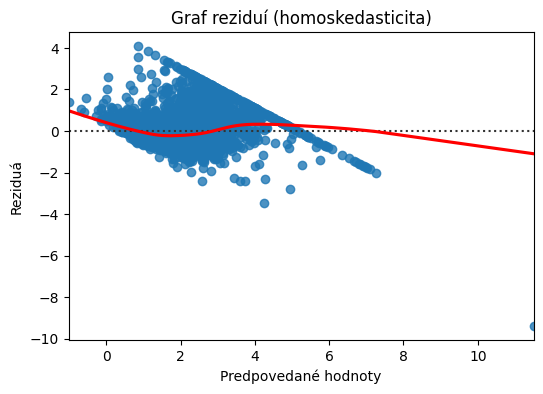

In [ ]:
import numpy as np

# Predikcie na testovacích dátach
y_pred = model.predict(X_test)

# Výpočet reziduí
residuals = y_test - y_pred

# Vizualizácia reziduí
plt.figure(figsize=(6, 4))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Predpovedané hodnoty")
plt.ylabel("Reziduá")
plt.title("Graf reziduí (homoskedasticita)")
plt.show()


**Normalita reziduí**
**Histogram reziduí a Q-Q plot**

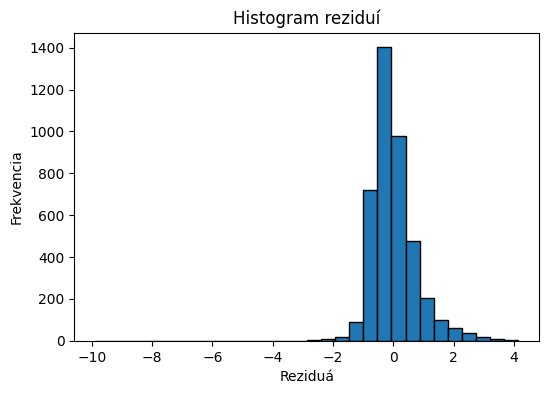

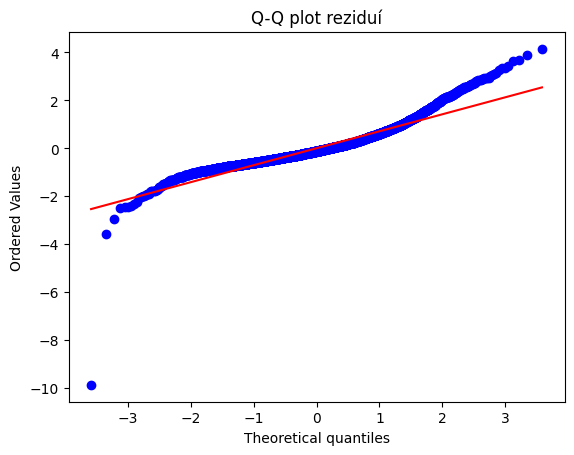

In [ ]:
import scipy.stats as stats

# Histogram reziduí
plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=30, edgecolor="black")
plt.xlabel("Reziduá")
plt.ylabel("Frekvencia")
plt.title("Histogram reziduí")
plt.show()

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q plot reziduí")
plt.show()


**Nezávislosť reziduí**
**Durbin-Watson test**

In [ ]:
from statsmodels.stats.stattools import durbin_watson

dw_statistic = durbin_watson(residuals)
print(f'Durbin-Watson štatistika: {dw_statistic}')


Durbin-Watson štatistika: 2.04074173872708


**Multikolinearita Variance Inflation Factor (VIF)**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Výpočet VIF
X_train_const = add_constant(X_train)
vif = pd.DataFrame()
vif["Premenná"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train_const.values, i+1) for i in range(X_train.shape[1])]

print(vif)


     Premenná       VIF
0      MedInc  2.539815
1    HouseAge  1.237337
2    AveRooms  7.917240
3   AveBedrms  6.609200
4  Population  1.134824
5    AveOccup  1.009733
6    Latitude  9.206134
7   Longitude  8.875984


**Vyhodnotenie modelu**


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R² Score: {r2:.4f}')


Mean Squared Error (MSE): 0.5559
R² Score: 0.5758


**Optimlaizácia modelu**

**Možnosť 1: Odstrániť jednu z vysoko korelovaných premenných**

Premenné AveRooms a AveBedrms sú si pravdepodobne veľmi podobné (viac izieb znamená viac spální). Odstránenie AveBedrms a znova prepočítať VIF



In [ ]:
X_train_reduced = X_train.drop(columns=["AveBedrms"])
X_test_reduced = X_test.drop(columns=["AveBedrms"])

# Prepočet VIF
X_train_const = add_constant(X_train_reduced)
vif_reduced = pd.DataFrame()
vif_reduced["Premenná"] = X_train_reduced.columns
vif_reduced["VIF"] = [variance_inflation_factor(X_train_const.values, i + 1) for i in range(X_train_reduced.shape[1])]

print(vif_reduced)


     Premenná       VIF
0      MedInc  1.313725
1    HouseAge  1.237295
2    AveRooms  1.277328
3  Population  1.134767
4    AveOccup  1.009090
5    Latitude  8.826012
6   Longitude  8.655964


**Trénovanie  modelu  lineárnej  regresie a kontrola R² a MSE**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Natrénovanie modelu na nových dátach
model = LinearRegression()
model.fit(X_train_reduced, y_train)

# Predikcia
y_pred = model.predict(X_test_reduced)

# Hodnotenie modelu
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Nový Mean Squared Error (MSE): {mse:.4f}')
print(f'Nový R² Score: {r2:.4f}')


Nový Mean Squared Error (MSE): 0.5473
Nový R² Score: 0.5823


**Ridge regresia**

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)  # Skús aj alpha=0.1 alebo 10
ridge.fit(X_train_reduced, y_train)

print(f'Ridge R²: {ridge.score(X_test_reduced, y_test):.4f}')


Ridge R²: 0.5823


**Polynomiálnu regresia** (ak je vzťah medzi premennými nelineárny):

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(2), LinearRegression())
poly_model.fit(X_train_reduced, y_train)

print(f'Polynomiálna R²: {poly_model.score(X_test_reduced, y_test):.4f}')


Polynomiálna R²: 0.6459


**Optimalizovať polynomiálny model**

Vyšší stupeň polynómu (degree=3):


In [ ]:
poly_model3 = make_pipeline(PolynomialFeatures(3), LinearRegression())
poly_model3.fit(X_train_reduced, y_train)
print(f'Polynomiálna R² (degree=3): {poly_model3.score(X_test_reduced, y_test):.4f}')


Polynomiálna R² (degree=3): -2.3318


**Random Forest**

Teraz môžeme porovnať Random Forest, ktorý často funguje lepšie ako polynomiálne model



In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_reduced, y_train)

print(f'Random Forest R²: {rf.score(X_test_reduced, y_test):.4f}')


Random Forest R²: 0.8062


 **Porovnanie modelov:**

Lineárna regresia: R² = 0.5823

Polynomiálna regresia (degree=2): R² = 0.6459

Polynomiálna regresia (degree=3): ❌ Overfitting (R² = -2.3318)

✅ Random Forest: R² = 0.8062 (Najlepší model!)